<a href="https://colab.research.google.com/github/shu736/Introduction-to-Pythom/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cal_err(b,x,y):
  n = len(y)
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  return np.sum((y-np.matmul(b,X.T))**2)*(0.5/n)

def grad(b,x,y):
  n = len(y) #This gives me the number of samples 
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  g = np.array([0]*len(b)) #gradients are zeros
  for i in range(len(b)):
    g[i] = (-1/n)*np.sum((y-np.matmul(b,X.T))*X.T[i,:]) #calculate gradients
  return g

def update_weights(b,eta,x,y):
  return b - eta*grad(b,x,y) #grad function returns the gradients and I am returning the updated weights

def grad_algo(x,y,eta,max_iter):
  #x is the input data
  #y is the output data
  #eta is learning rate 
  #max_iter is the maximem iterations
  num_rows, n = x.shape #n is the number of features or the number of variables in the dataset
  b = np.zeros(n+1) #initialize the betas to zeros
  error = [cal_err(b,x,y)] #This function calculates the error
  iter = 1 #This indicates the current iteration
  while iter < max_iter:
    b = update_weights(b,eta,x,y) #This function updates the weghts in every iteration
    error.append(cal_err(b,x,y)) #Update error for the updated weights and store in the list
    iter = iter+1
  plt.scatter(np.arange(1,len(error)+1,1),np.array(error)) #plots error vs iterations
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.show()
  return b

def predict(b,x):
  return b[0]+np.sum(b[1:]*x) #b0+b1*x1+b2*x2+...+bn*nx

In [ ]:
from google.colab import files
data = files.upload() #uploading the data

Saving hou_all.csv to hou_all.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(data['hou_all.csv']),header=None) #reading the csv from system to Pandas Dataframe. Header is none because the csv file has no header
print(df.head())#printing out first five rows in the dataset
Data = df.to_numpy() #Converting the dataframe to numpy 2D array
x = Data[:,0:13] #This selects the first 13 columns which correspond to the features or x 
y = Data[:,13] #This selects the 14 column which corresponds to the targets

#Keep some 20 samples/examples for testing and remaining for training
x_train = x[:-20,:] #this selects all the examples except the last 20
y_train = y[:-20]
x_test = x[-20:,:]#this selects the last 20 examples
y_test = y[-20:]

        0     1     2   3      4      5   ...   9     10      11    12    13  14
0  0.00632  18.0  2.31   0  0.538  6.575  ...  296  15.3  396.90  4.98  24.0   1
1  0.02731   0.0  7.07   0  0.469  6.421  ...  242  17.8  396.90  9.14  21.6   1
2  0.02729   0.0  7.07   0  0.469  7.185  ...  242  17.8  392.83  4.03  34.7   1
3  0.03237   0.0  2.18   0  0.458  6.998  ...  222  18.7  394.63  2.94  33.4   1
4  0.06905   0.0  2.18   0  0.458  7.147  ...  222  18.7  396.90  5.33  36.2   1

[5 rows x 15 columns]


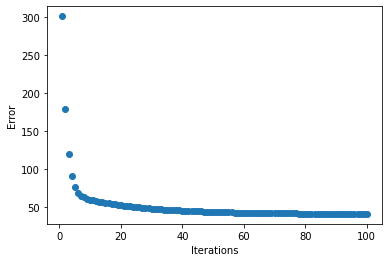

The predicted value for 10 test data is: 24.217378577599995
The actual value for 10 test data is: 19.7
The training error after 100 iterations is:  41.22840330684569
The error for test data is:  24.968520671900208


In [ ]:
b = grad_algo(x_train,y_train,0.000001,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

#Feature scaling
why we need to scale the features?
MinMax Scaling: (x-xmin)/(xmax-xmin) This brings all the features into the range of [0,1]

Normalization: (x-xmean)/x_std, where xmean is the mean value of the feature and x_std is the standard deviation. This also bring all the feature into [0,1]

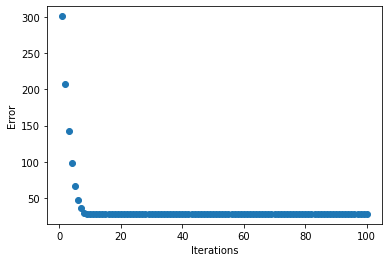

The predicted value for 10 test data is: 21.5645105833538
The actual value for 10 test data is: 19.7
The training error after 100 iterations is:  28.221534730098814
The error for test data is:  16.160092644052703


In [ ]:
x_minmax = (x - x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)) #Performing minmax scaling on the data. axis=0 indicates column wise calculation
x_train = x_minmax[:-20,:]
x_test = x_minmax[-20:,:]
b = grad_algo(x_train,y_train,0.5,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

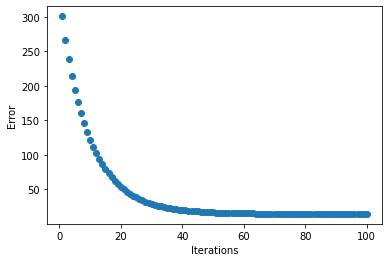

The predicted value for 10 test data is: 15.167592339808216
The actual value for 10 test data is: 19.7
The training error after 100 iterations is:  14.373047659087133
The error for test data is:  5.770596457467509


In [ ]:
x_normed = (x - x.mean(axis=0))/(x.std(axis=0)) #Performing mormalization scaling on the data. axis=0 indicates column wise calculation
x_train = x_normed[:-20,:]
x_test = x_normed[-20:,:]
b = grad_algo(x_train,y_train,0.05,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

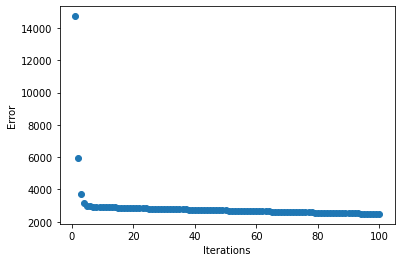

The predicted value for 10 test data is: 165.38857401364018
The actual value for 10 test data is: 173.0
The training error after 100 iterations is:  2483.6744846243478
The error for test data is:  2238.605061679154


In [ ]:
from sklearn import datasets
x,y = datasets.load_diabetes(return_X_y = True)
#Keep some 20 samples/examples for testing and remaining for training
x_train = x[:-20,:] #this selects all the examples except the last 20
y_train = y[:-20]
x_test = x[-20:,:]#this selects the last 20 examples
y_test = y[-20:]
b = grad_algo(x_train,y_train,0.5,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

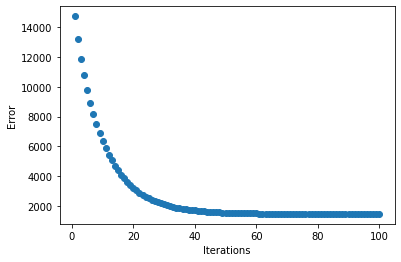

The predicted value for 10 test data is: 217.77288883434858
The actual value for 10 test data is: 173.0
The training error after 100 iterations is:  1467.593863820723
The error for test data is:  1024.5767892547626


In [ ]:
x_normed = (x - x.mean(axis=0))/(x.std(axis=0)) #Performing mormalization scaling on the data. axis=0 indicates column wise calculation
x_train = x_normed[:-20,:]
x_test = x_normed[-20:,:]
b = grad_algo(x_train,y_train,0.05,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

Batch Gradient Descent uses the entire set of examples to calculate the gradients in every iteration. If the number of samples is very high it will take enormous time to calculate the gradients. So the alterantive is Stochastic Gradient Descent (SGD)

In [ ]:
def SGD(x,y,eta,max_iter):
  #x is the input data
  #y is the output data
  #eta is learning rate 
  #max_iter is the maximem iterations
  num_rows, n = x.shape #n is the number of features or the number of variables in the dataset
  b = np.zeros(n+1) #initialize the betas to zeros
  error = [cal_err(b,x,y)] #This function calculates the error
  iter = 1 #This indicates the current iteration
  while iter < max_iter:
    b = update_weights(b,eta,[x[iter,:]],[y[iter]]) #We are choosing only one example in every iteration
    error.append(cal_err(b,x,y)) #Update error for the updated weights and store in the list
    iter = iter+1
  plt.scatter(np.arange(1,len(error)+1,1),np.array(error)) #plots error vs iterations
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.show()
  return b 

In [ ]:
df = pd.read_csv(io.BytesIO(data['hou_all.csv']),header=None) #reading the csv from system to Pandas Dataframe. Header is none because the csv file has no header
print(df.head())#printing out first five rows in the dataset
Data = df.to_numpy() #Converting the dataframe to numpy 2D array
x = Data[:,0:13] #This selects the first 13 columns which correspond to the features or x 
y = Data[:,13] #This selects the 14 column which corresponds to the targets

#Keep some 20 samples/examples for testing and remaining for training
x_train = x[:-20,:] #this selects all the examples except the last 20
y_train = y[:-20]
x_test = x[-20:,:]#this selects the last 20 examples
y_test = y[-20:]

        0     1     2   3      4      5   ...   9     10      11    12    13  14
0  0.00632  18.0  2.31   0  0.538  6.575  ...  296  15.3  396.90  4.98  24.0   1
1  0.02731   0.0  7.07   0  0.469  6.421  ...  242  17.8  396.90  9.14  21.6   1
2  0.02729   0.0  7.07   0  0.469  7.185  ...  242  17.8  392.83  4.03  34.7   1
3  0.03237   0.0  2.18   0  0.458  6.998  ...  222  18.7  394.63  2.94  33.4   1
4  0.06905   0.0  2.18   0  0.458  7.147  ...  222  18.7  396.90  5.33  36.2   1

[5 rows x 15 columns]


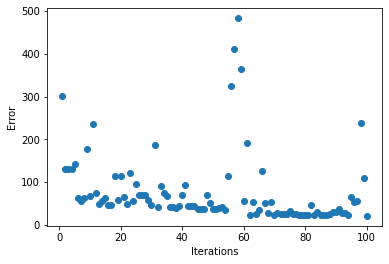

The predicted value for 10 test data is: 19.568038366698236
The actual value for 10 test data is: 19.7
The training error after 100 iterations is:  21.434940796940058
The error for test data is:  8.924813043136522


In [ ]:
x_minmax = (x - x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)) #Performing minmax scaling on the data. axis=0 indicates column wise calculation
x_train = x_minmax[:-20,:]
x_test = x_minmax[-20:,:]
b = SGD(x_train,y_train,0.5,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

SGD is faster compared to batch gradient descent but the error fluctuates. So alternative is mini-batch gradient descent

In [ ]:
def mini_grad_algo(x,y,eta,max_iter):
  #x is the input data
  #y is the output data
  #eta is learning rate 
  #max_iter is the maximem iterations
  num_rows, n = x.shape #n is the number of features or the number of variables in the dataset
  batchsize = 30 #This indicates number of examples to be passed in every iteration
  b = np.zeros(n+1) #initialize the betas to zeros
  error = [cal_err(b,x,y)] #This function calculates the error
  iter = 1 #This indicates the current iteration
  while iter < max_iter:
    b = update_weights(b,eta,x[iter-1:iter-1+batchsize,:],y[iter-1:iter-1+batchsize]) #I am passing only a batch of examples instead of the entire set
    error.append(cal_err(b,x,y)) #Update error for the updated weights and store in the list
    iter = iter+1
  plt.scatter(np.arange(1,len(error)+1,1),np.array(error)) #plots error vs iterations
  plt.xlabel("Iterations")
  plt.ylabel("Error")
  plt.show()
  return b

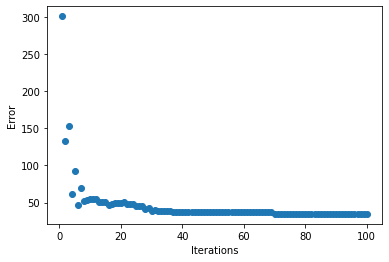

The predicted value for 10 test data is: 21.210880423736395
The actual value for 10 test data is: 19.7
The training error after 100 iterations is:  35.11082588077296
The error for test data is:  12.222367459280969


In [ ]:
x_minmax = (x - x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)) #Performing minmax scaling on the data. axis=0 indicates column wise calculation
x_train = x_minmax[:-20,:]
x_test = x_minmax[-20:,:]
b = mini_grad_algo(x_train,y_train,0.5,100) 
print("The predicted value for 10 test data is:", predict(b,x_test[10,:])) #Predicted value
print("The actual value for 10 test data is:", y_test[10]) #Actual value
print("The training error after 100 iterations is: ",cal_err(b,x_train,y_train)) #Training error
print("The error for test data is: ",cal_err(b,x_test,y_test))#Testing error

In [ ]:
def loss(b,x,y):
  n = len(y)
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  z = np.matmul(b,X.T)
  h = 1/(1+np.exp(-z))
  return (-1/n)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))

#This is for calculating the gradients of a logistic regression problem
def grad_class(b,x,y):
  n = len(y) #This gives me the number of samples 
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  g = np.array([0]*len(b)) #gradients are zeros
  for i in range(len(b)):
    z = np.matmul(b,X.T)
    h = 1/(1+np.exp(-z))
    g[i] = (-1/n)*np.sum((y-h)*X.T[i,:]) #calculate gradients
  return g

def update_weights(b,eta,x,y):
  return b - eta*grad_class(b,x,y) #grad function returns the gradients and I am returning the updated weights

def grad_algo_class(x,y,eta,max_iter):
  #x is the input data
  #y is the output data
  #eta is learning rate 
  #max_iter is the maximem iterations
  num_rows, n = x.shape #n is the number of features or the number of variables in the dataset
  b = np.zeros(n+1) #initialize the betas to zeros
  error = [loss(b,x,y)] #This function calculates the loss
  iter = 1 #This indicates the current iteration
  while iter < max_iter:
    b = update_weights(b,eta,x,y) #This function updates the weghts in every iteration
    error.append(loss(b,x,y)) #Update error for the updated weights and store in the list
    iter = iter+1
  plt.scatter(np.arange(1,len(error)+1,1),np.array(error)) #plots error vs iterations
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.show()
  return b


def accuracy (b,x,y):
  n = len(y) #calculates the number of examples
  X = np.insert(x,0,np.ones(n),axis = 1) #Inserting a column of ones to the existing matrix x
  z = np.matmul(b,X.T)
  h = 1/(1+np.exp(-z)) #sigmoid function
  y_pred = np.zeros(n)
  for i in range(n):
    if h[i] > 0.5: #If h is > 0.5 it is positive class
      y_pred[i] = 1
    else:
      y_pred[i] = 0
  acc = 0
  for i in range(n):
    if y[i] == y_pred[i]: #iF PREDICTED CLASS IS SAME AS ACTUAL ACTUAL INCREMENT ACC BY 1
      acc = acc+1
  return 100*acc/n



In [ ]:
data = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv(io.BytesIO(data['diabetes.csv'])) #reading the csv from system to Pandas Dataframe. Header is none because the csv file has no header
print(df.head())#printing out first five rows in the dataset
Data = df.to_numpy() #Converting the dataframe to numpy 2D array
x = Data[:,0:8] #This selects the first 8 columns which correspond to the features or x 
y = Data[:,8] #This selects the 9 column which corresponds to the targets

#Keep some 20 samples/examples for testing and remaining for training
x_train = x[:-20,:] #this selects all the examples except the last 20
y_train = y[:-20]
x_test = x[-20:,:]#this selects the last 20 examples
y_test = y[-20:]

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


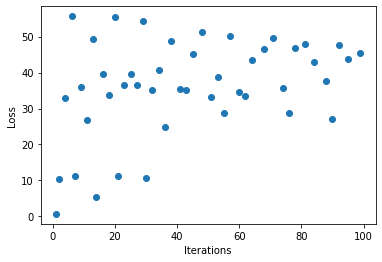

The training accuracy: 66.97860962566845
testing accuracy: 65.0


In [ ]:
b = grad_algo_class(x_train,y_train,0.01,100) 
print('The training accuracy:',accuracy(b,x_train,y_train))
print("testing accuracy:",accuracy(b,x_test,y_test))